$$ EN3160 \quad Assignment \quad 1\quad  on \quad Intensity  \quad Transformations  \quad and  \quad Neighborhood  \quad Filtering $$

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


$$ Question \quad 1 $$

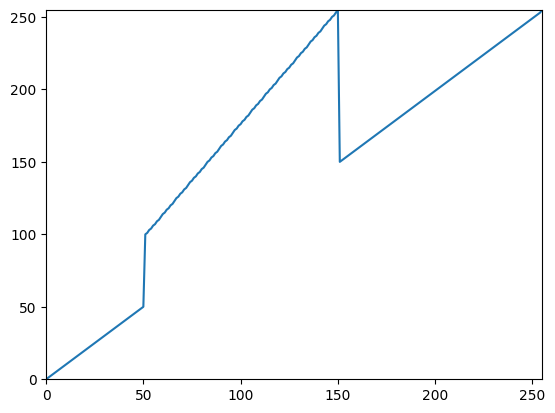

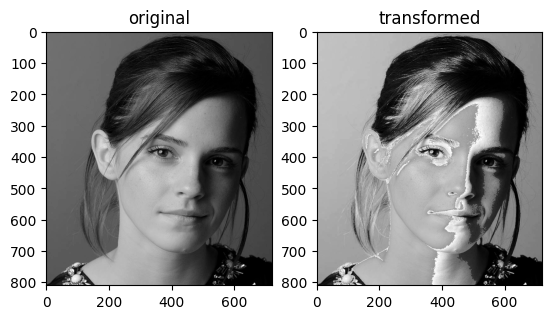

In [29]:
#import image
img_1 = cv.imread('emma.jpg' , cv.IMREAD_GRAYSCALE)
#trasformer
c = np.array([(50,50) ,(50,100), (150,255), (150,150), (255,255) ] )
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[1,1] ).astype('uint8')
t3 = np.linspace(c[3,1], c[4,1], 105).astype('uint8')
t = np.concatenate((t1,t2,t3), axis = 0)

#plot the graph

plt.plot(t)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

#apply the transformer

transformed_img_1 = cv.LUT(img_1, t)

# #show both original and transformed image
# cv.imshow('original', img_1)
# cv.imshow('transformed', transformed_img_1)
# cv.waitKey(0)
# cv.destroyAllWindows()

#plot two images
plt.subplot(1,2,1)
plt.imshow(img_1, cmap = 'gray')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(transformed_img_1, cmap = 'gray')
plt.title('transformed')
plt.show()




$$ Question \quad 2 $$

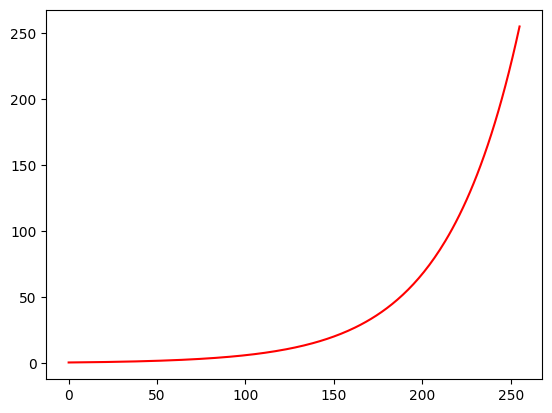

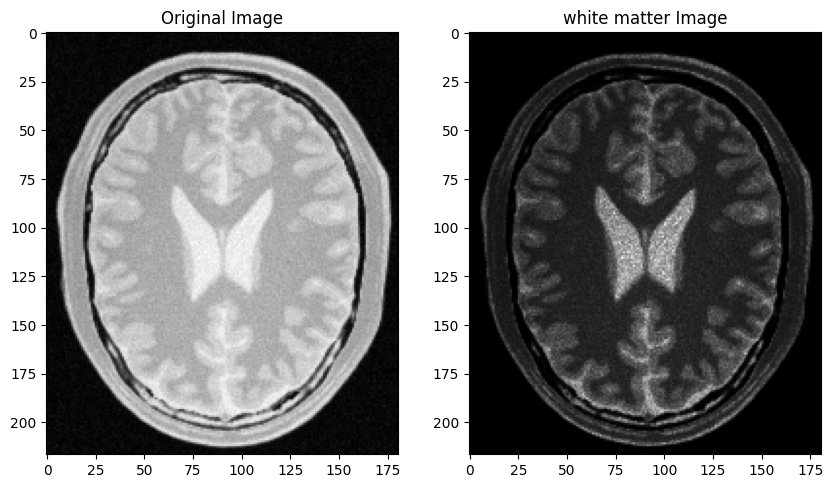

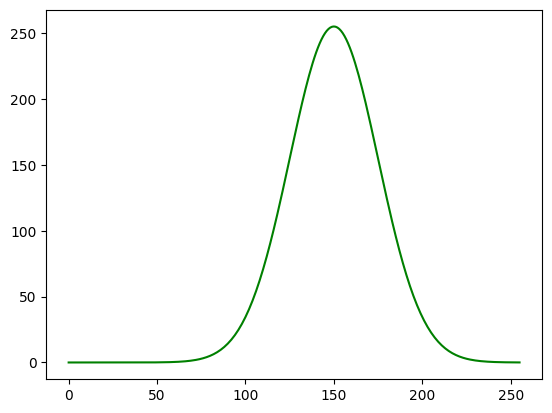

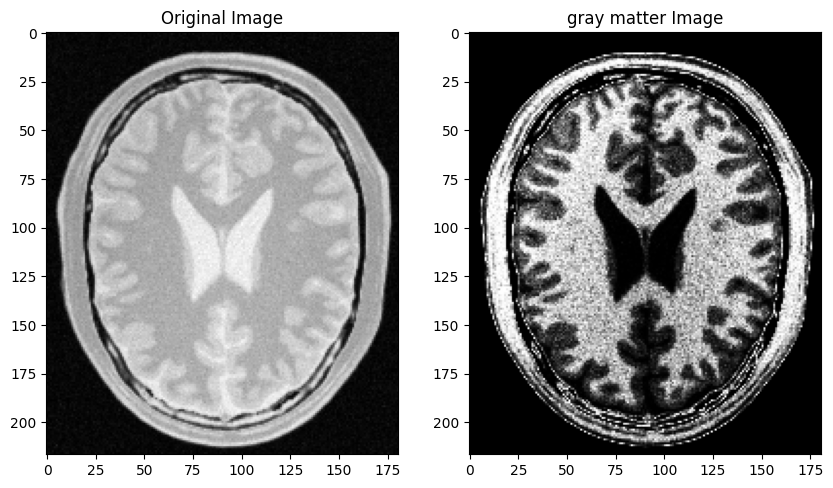

In [72]:
img_2 = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)


# (a) accentuate white matter

# tranformer 1
list_1 = np.arange(0,256)
t_2 = 5**(0.015*list_1)
t_2 = (t_2/np.max(t_2))*255

img_2_transformed= cv.LUT(img_2, t_2.astype('uint8'))
plt.plot(list_1, t_2, 'r')

#plot two images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_2, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(img_2_transformed, cmap='gray')
plt.title('white matter Image')
plt.show()


# (b) accentuate gray matter

# tranformer 2
mean = 150
std_dev = 25  
x = np.linspace(0, 255, 256)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
t_3 = (y - np.min(y)) * 255 / (np.max(y) - np.min(y))

img_2_transformed_2= cv.LUT(img_2, t_3.astype('uint8')) 
plt.plot(list_2, t_3, 'g')

#plot two images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_2, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(img_2_transformed_2, cmap='gray')
plt.title('gray matter Image')
plt.show()

